# Ejercicio N°2: Clasificación Estadística Paramétrica
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).

Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.

In [1]:
#@title 0.- Import de lib a usar y funciones adicionales
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
#@title 1.-Funciones adicionales
# -----------------------------------------------------------------------------
def ajuste_norm(data,ax):
    mu, std = norm.fit(data);
    xmin,xmax = ax.get_xlim();
    x = np.linspace(xmin, xmax, 50);
    p = norm.pdf(x, mu, std);
    ax.plot(x, p, 'k', linewidth=2)

## Ejercicio N°2.1.1: Casos Covid

1. Hay variables que puedan ser razonablemente consideradas normales?

2. Hay variables que tienen un comportamiento sospechoso?

### Respuestas
1. Según los histogramas obtenidos, ninguna variable presenta indicios de una distribución normal sobre su soporte.
 Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

2. Comportamiento sospechoso: La variable,
 - **contencion_psicologica**: presenta dos cluster definidos. Puede deberse a la saturación del equipo de trabajo.
 - **monitoreo_epidemiologico**: presenta dos cluster definidos tambien. En epoca de crecemiento de casos de covid, puede que la baja a la mitad practicamente se deba a una politica ministerial. En uno de los clusters se exhibe un comportamiento gausiano.


In [3]:
url_file_casos = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv';

data_covid = pd.read_csv(url_file_casos);
orden = data_covid.shape;
nro_cols = orden[1];
namecols = data_covid.columns;
display(data_covid);


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


### Plots de cols respecto al tiempo

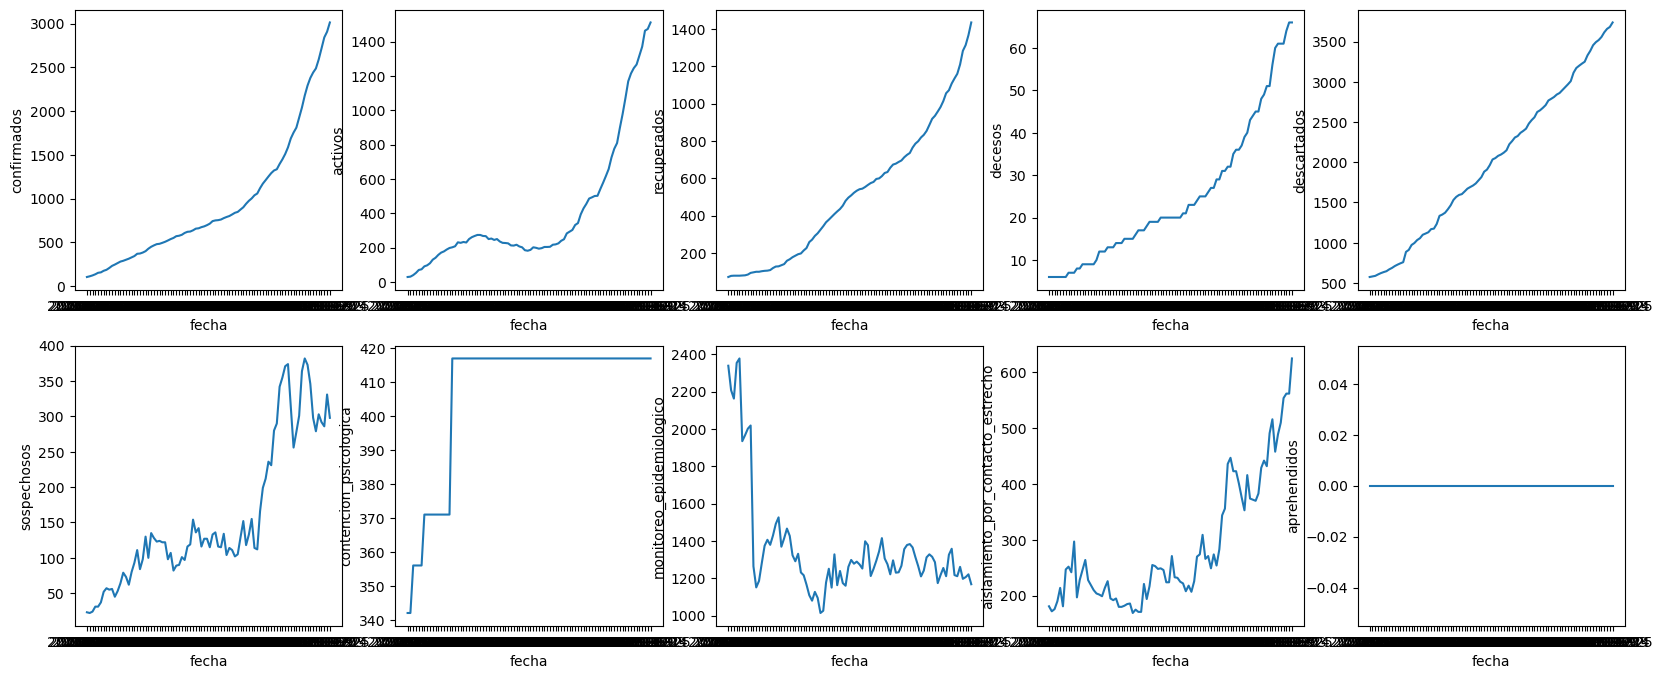

In [4]:
# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(2,5, figsize = ( 20, 8));
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_covid, ax=ax1[ax_row][i%5])


### Histogramas de cols y ajuste normal

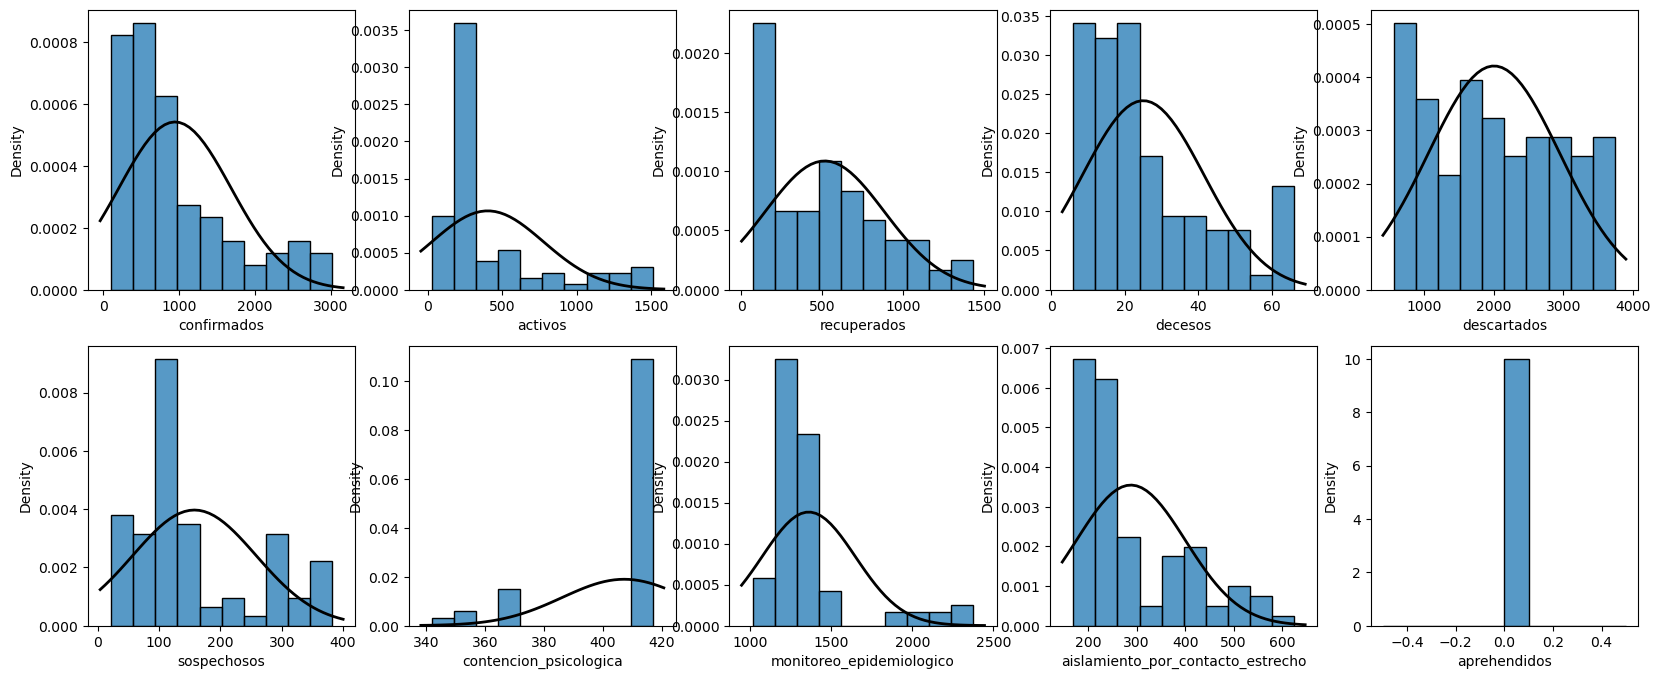

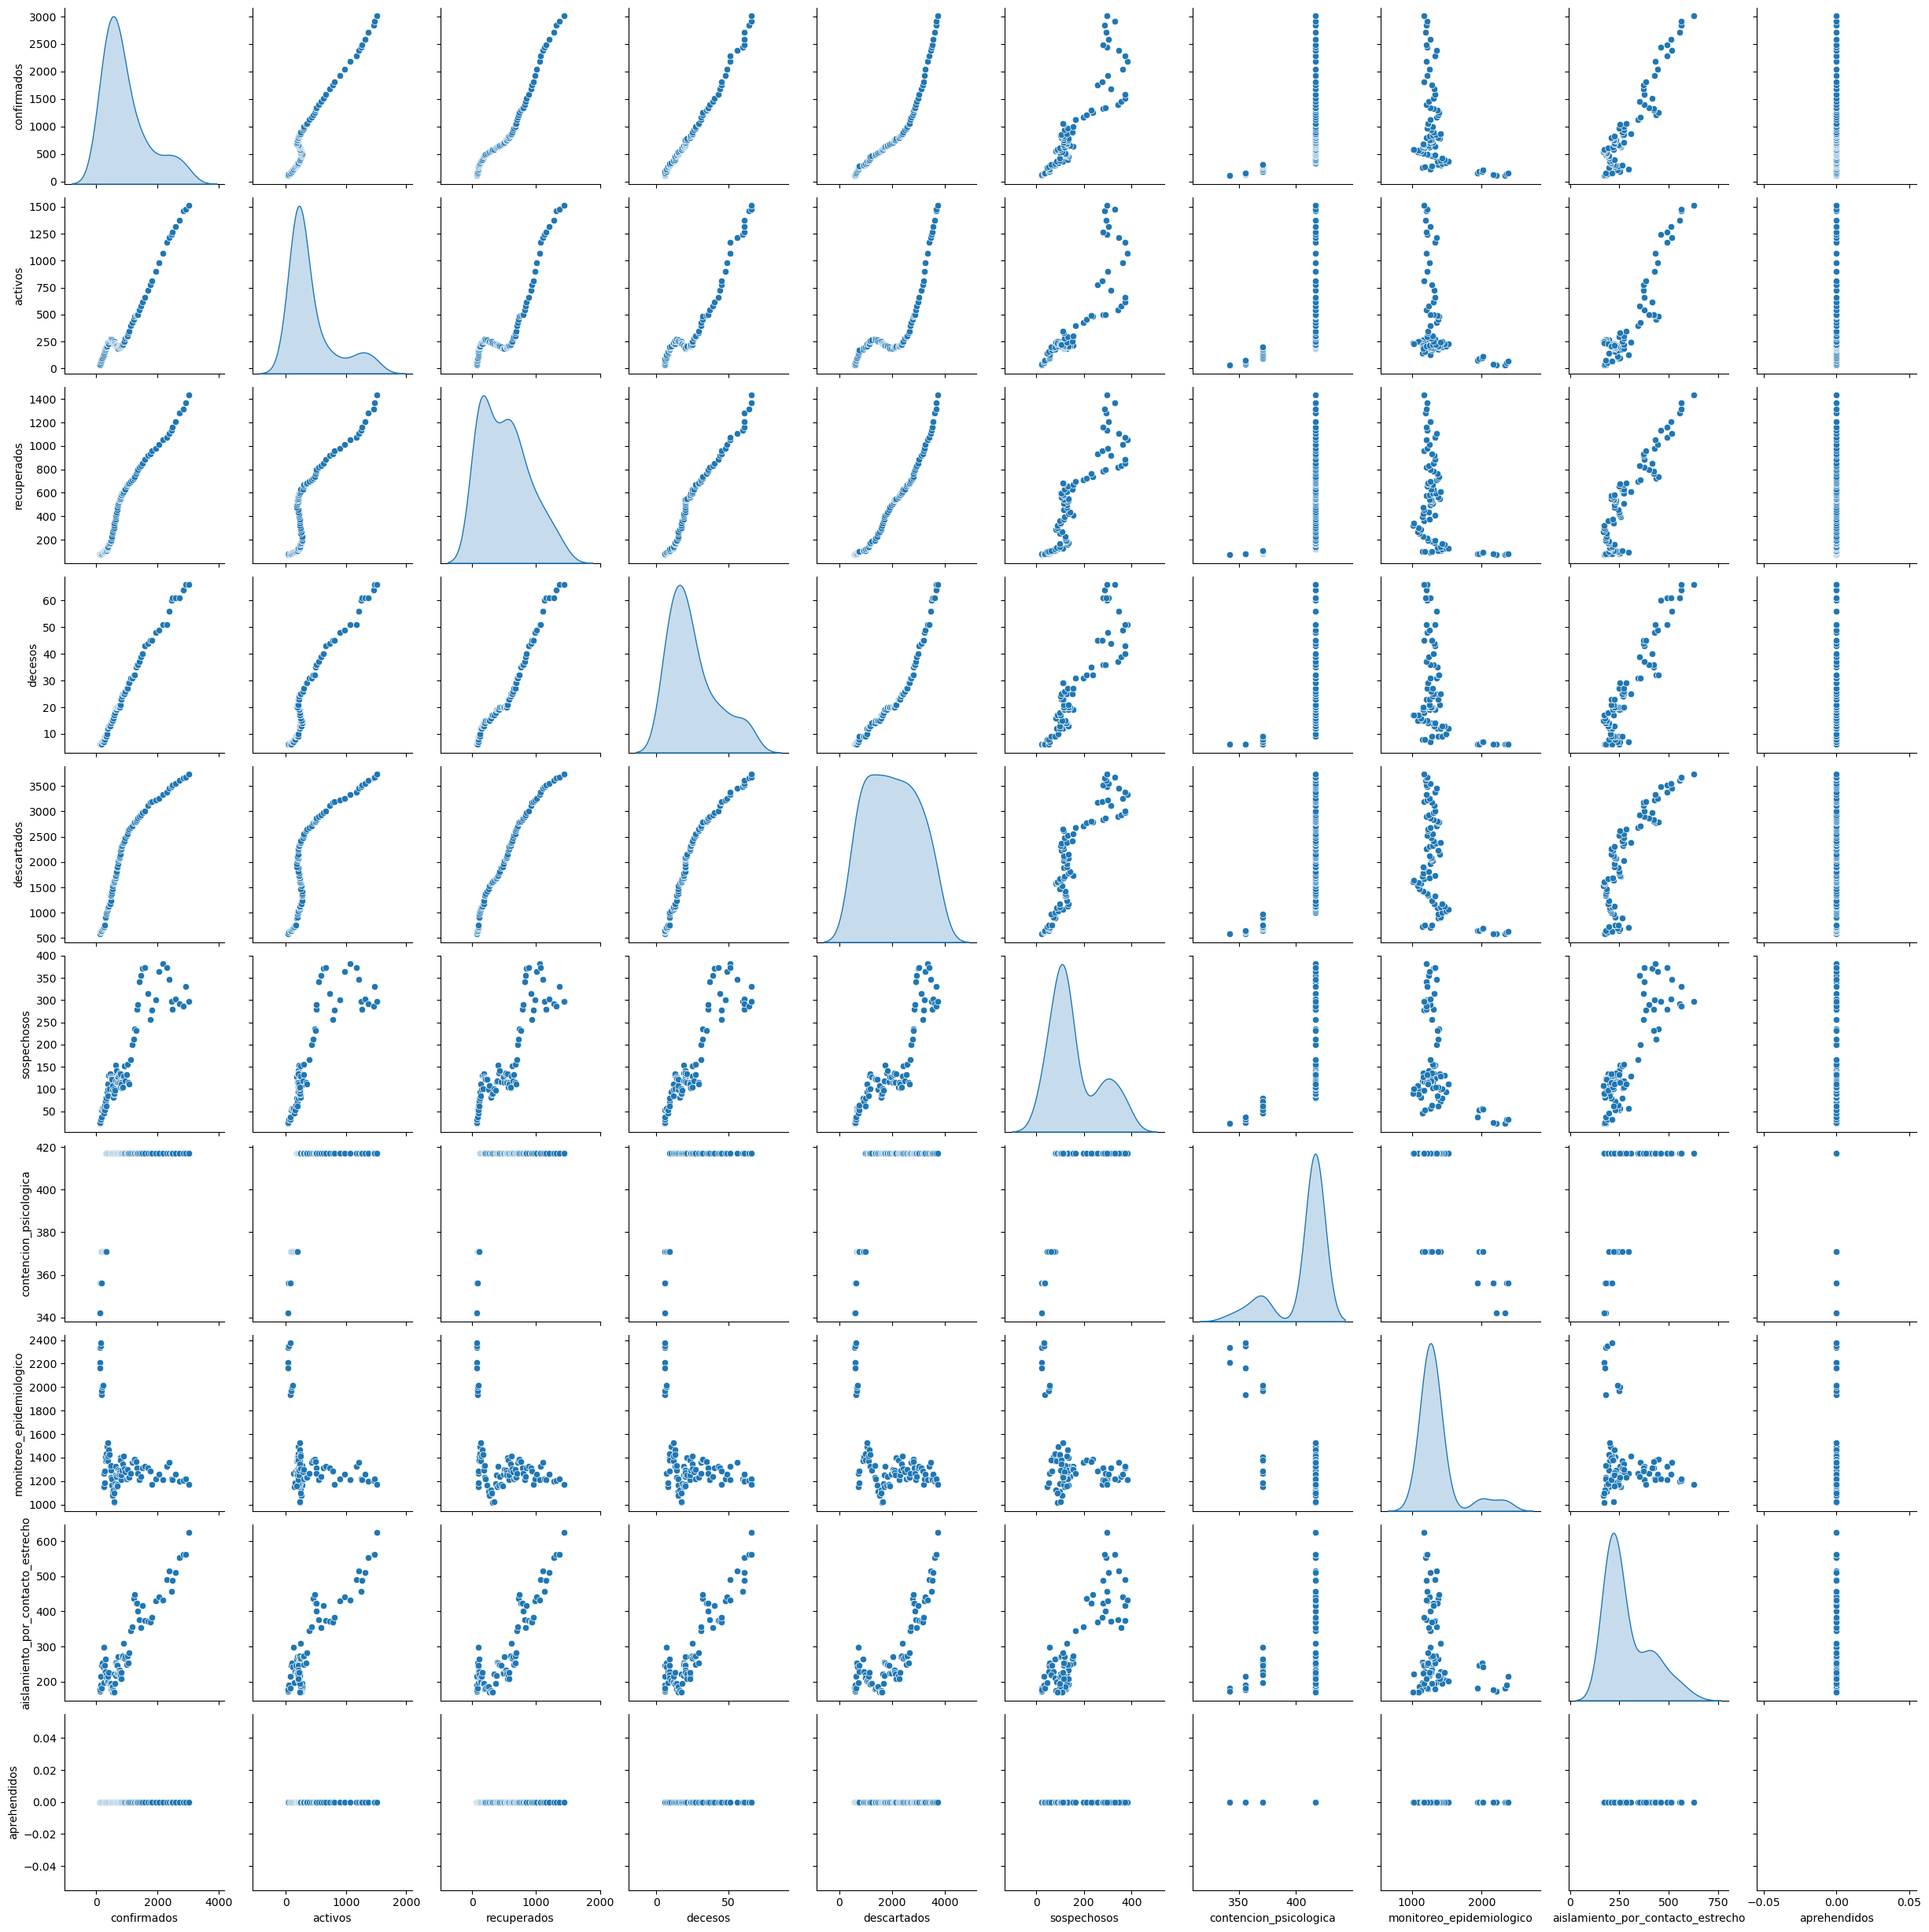

In [5]:
# Histogramas de cols
_, ax2 = plt.subplots(2,5, figsize = ( 20, 8))
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_covid, bins=10,stat="density", ax=ax2[ax_row][i%5])

# Ajute normal
ax_row = -1;
for i in range(9):
  if (i%5 ==0): ax_row = ax_row +1
  ajuste_norm(data_covid[namecols[i+1]],ax2[ax_row][i%5])  

sns.pairplot(data_covid,diag_kind="kde")

## Ejercicio N°2.1.2: Camas Covid

### Respuestas
Según los histogramas obtenidos, **camas_ocupadas_hospitales**,**camas_sospechosos_covid**, presentan a priori una distribución normal sobre su soporte(descartando los outliers por datos faltantes).
Podria decirse que la variable, **descartados** presenta una tendencia a una distribucion uniforme.


In [6]:
#%% Ejercicio N°1 -Camas covid
url_file_camas = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv';
data_camas = pd.read_csv(url_file_camas);
namecols = data_camas.columns;
display(data_camas);

del data_camas[namecols[0]];
namecols = data_camas.columns;
orden = data_camas.shape;
nro_cols = orden[1];

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


### Plots de cols respecto al tiempo

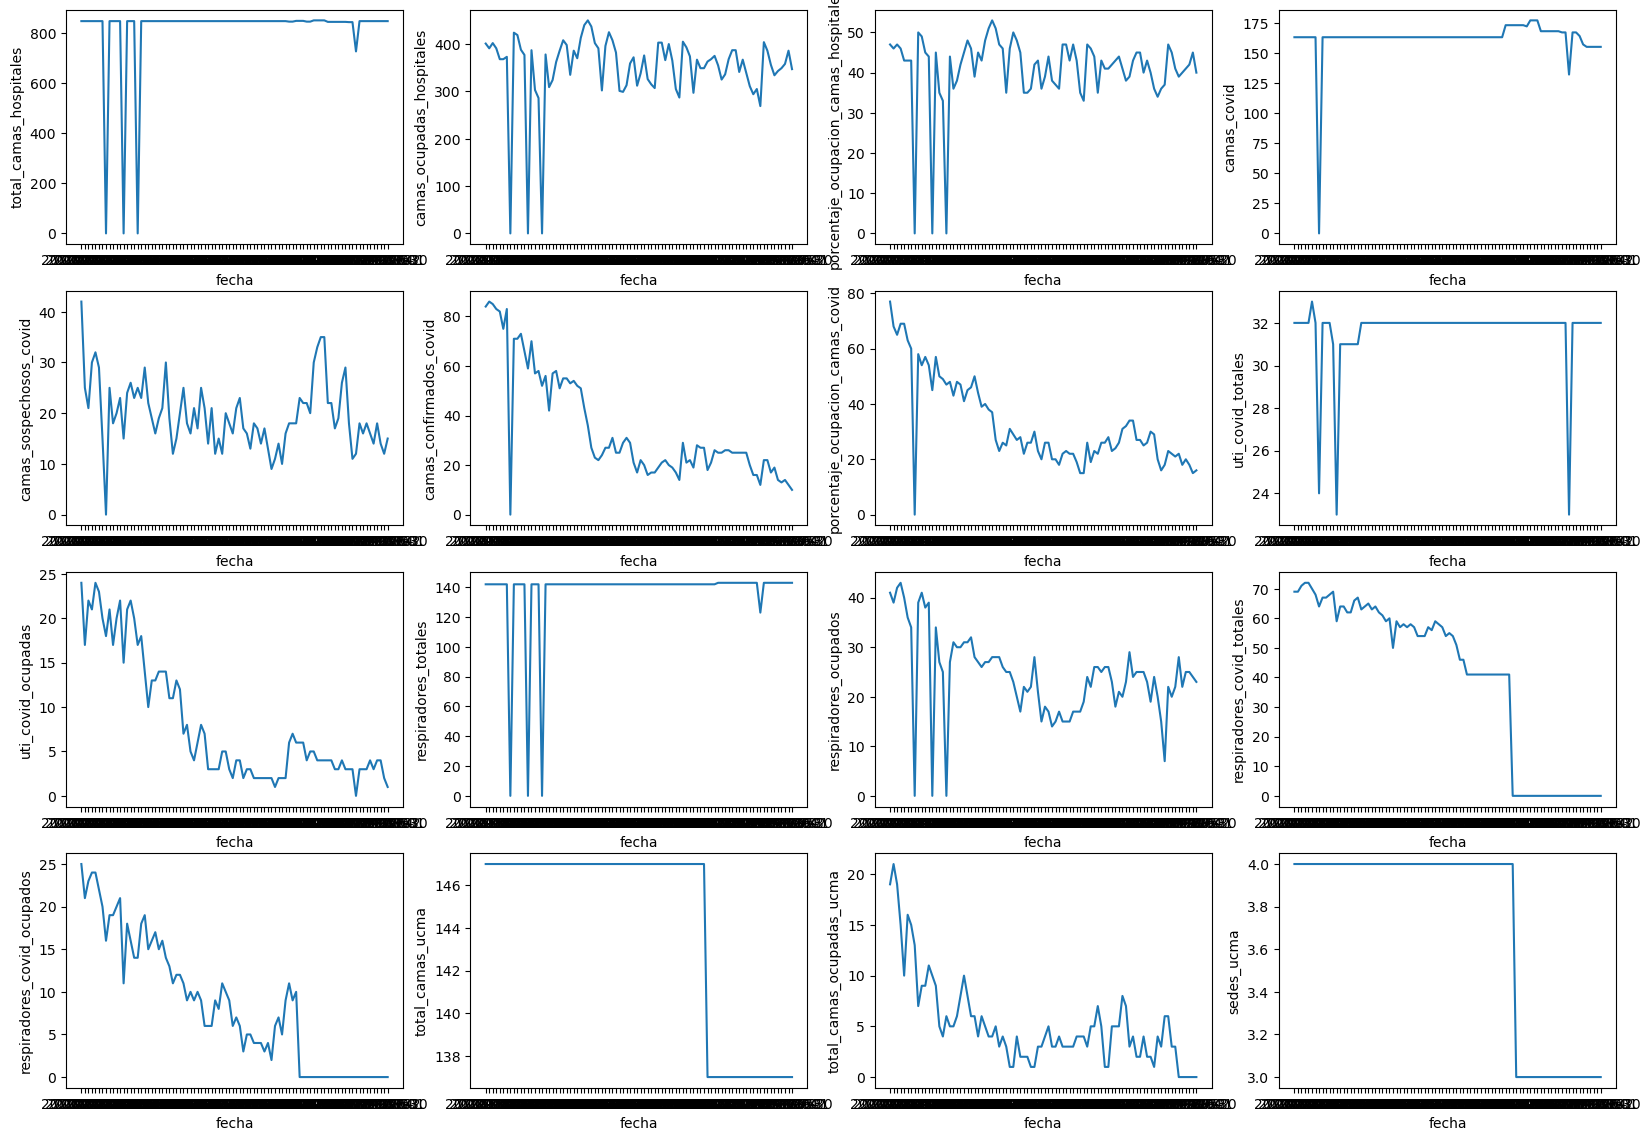

In [7]:
# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas, ax=ax1[ax_row][i%4])

### Histogramas de cols y ajuste normal

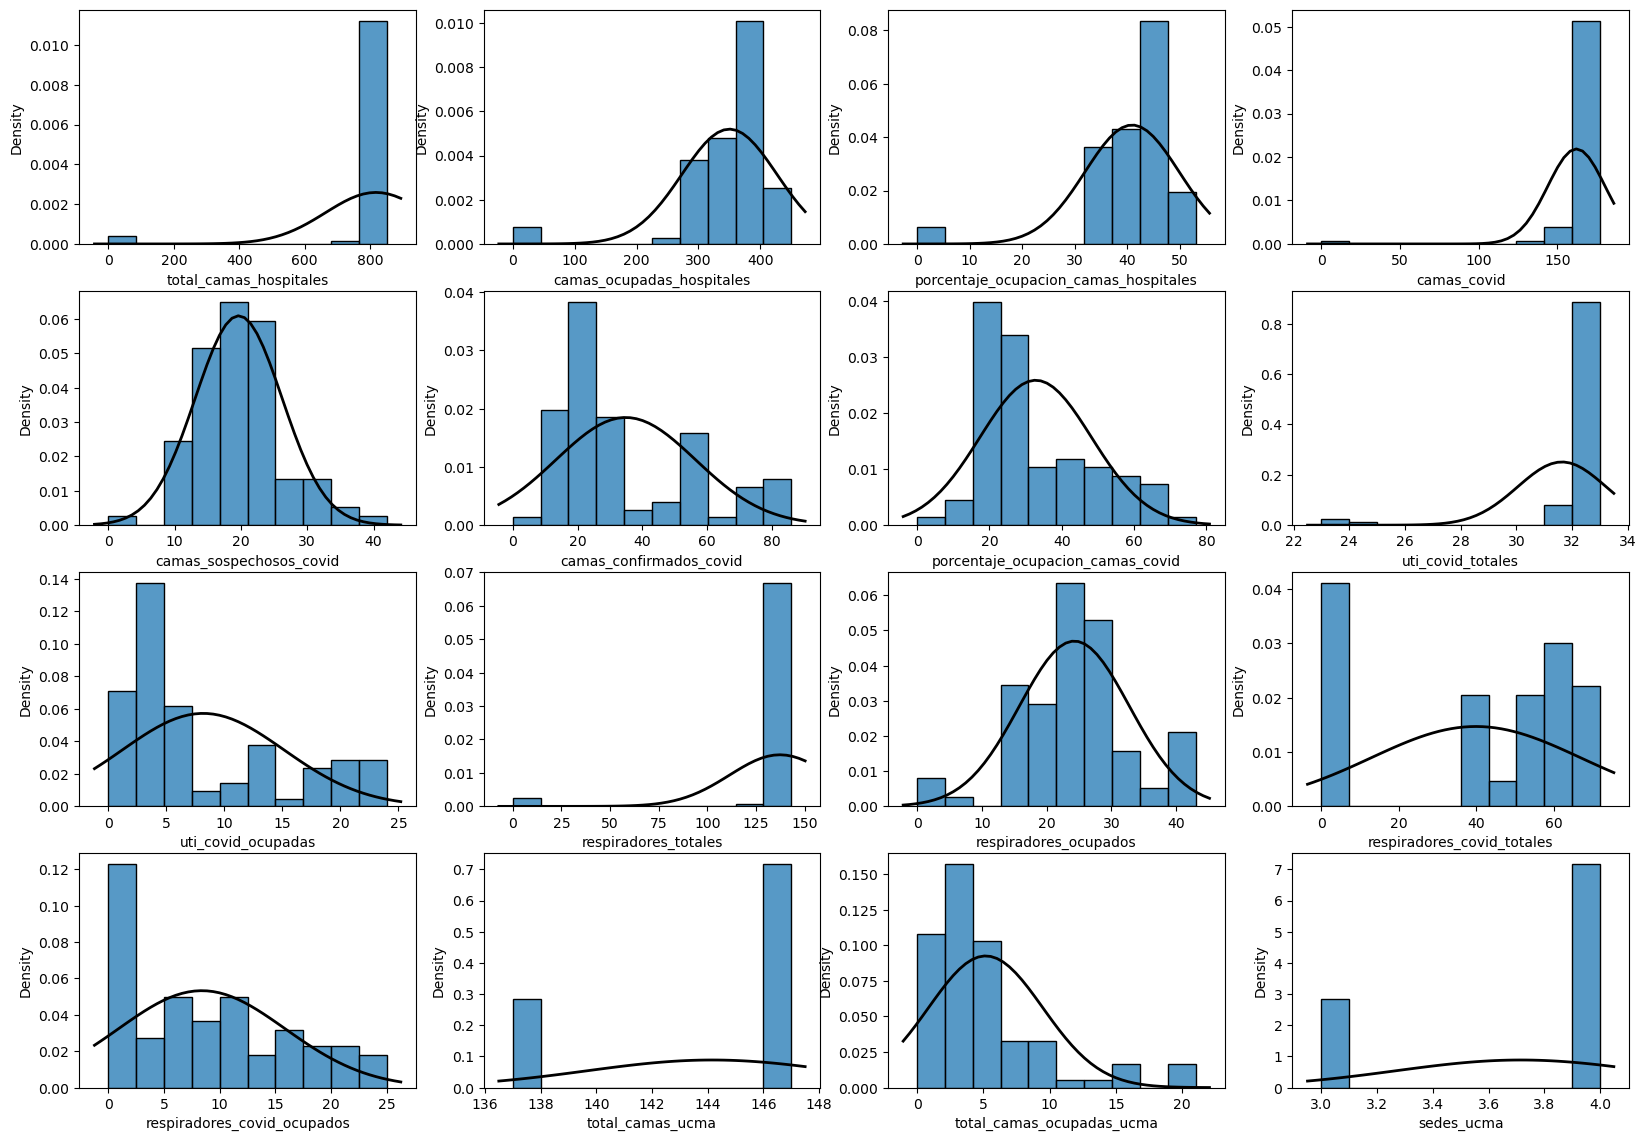

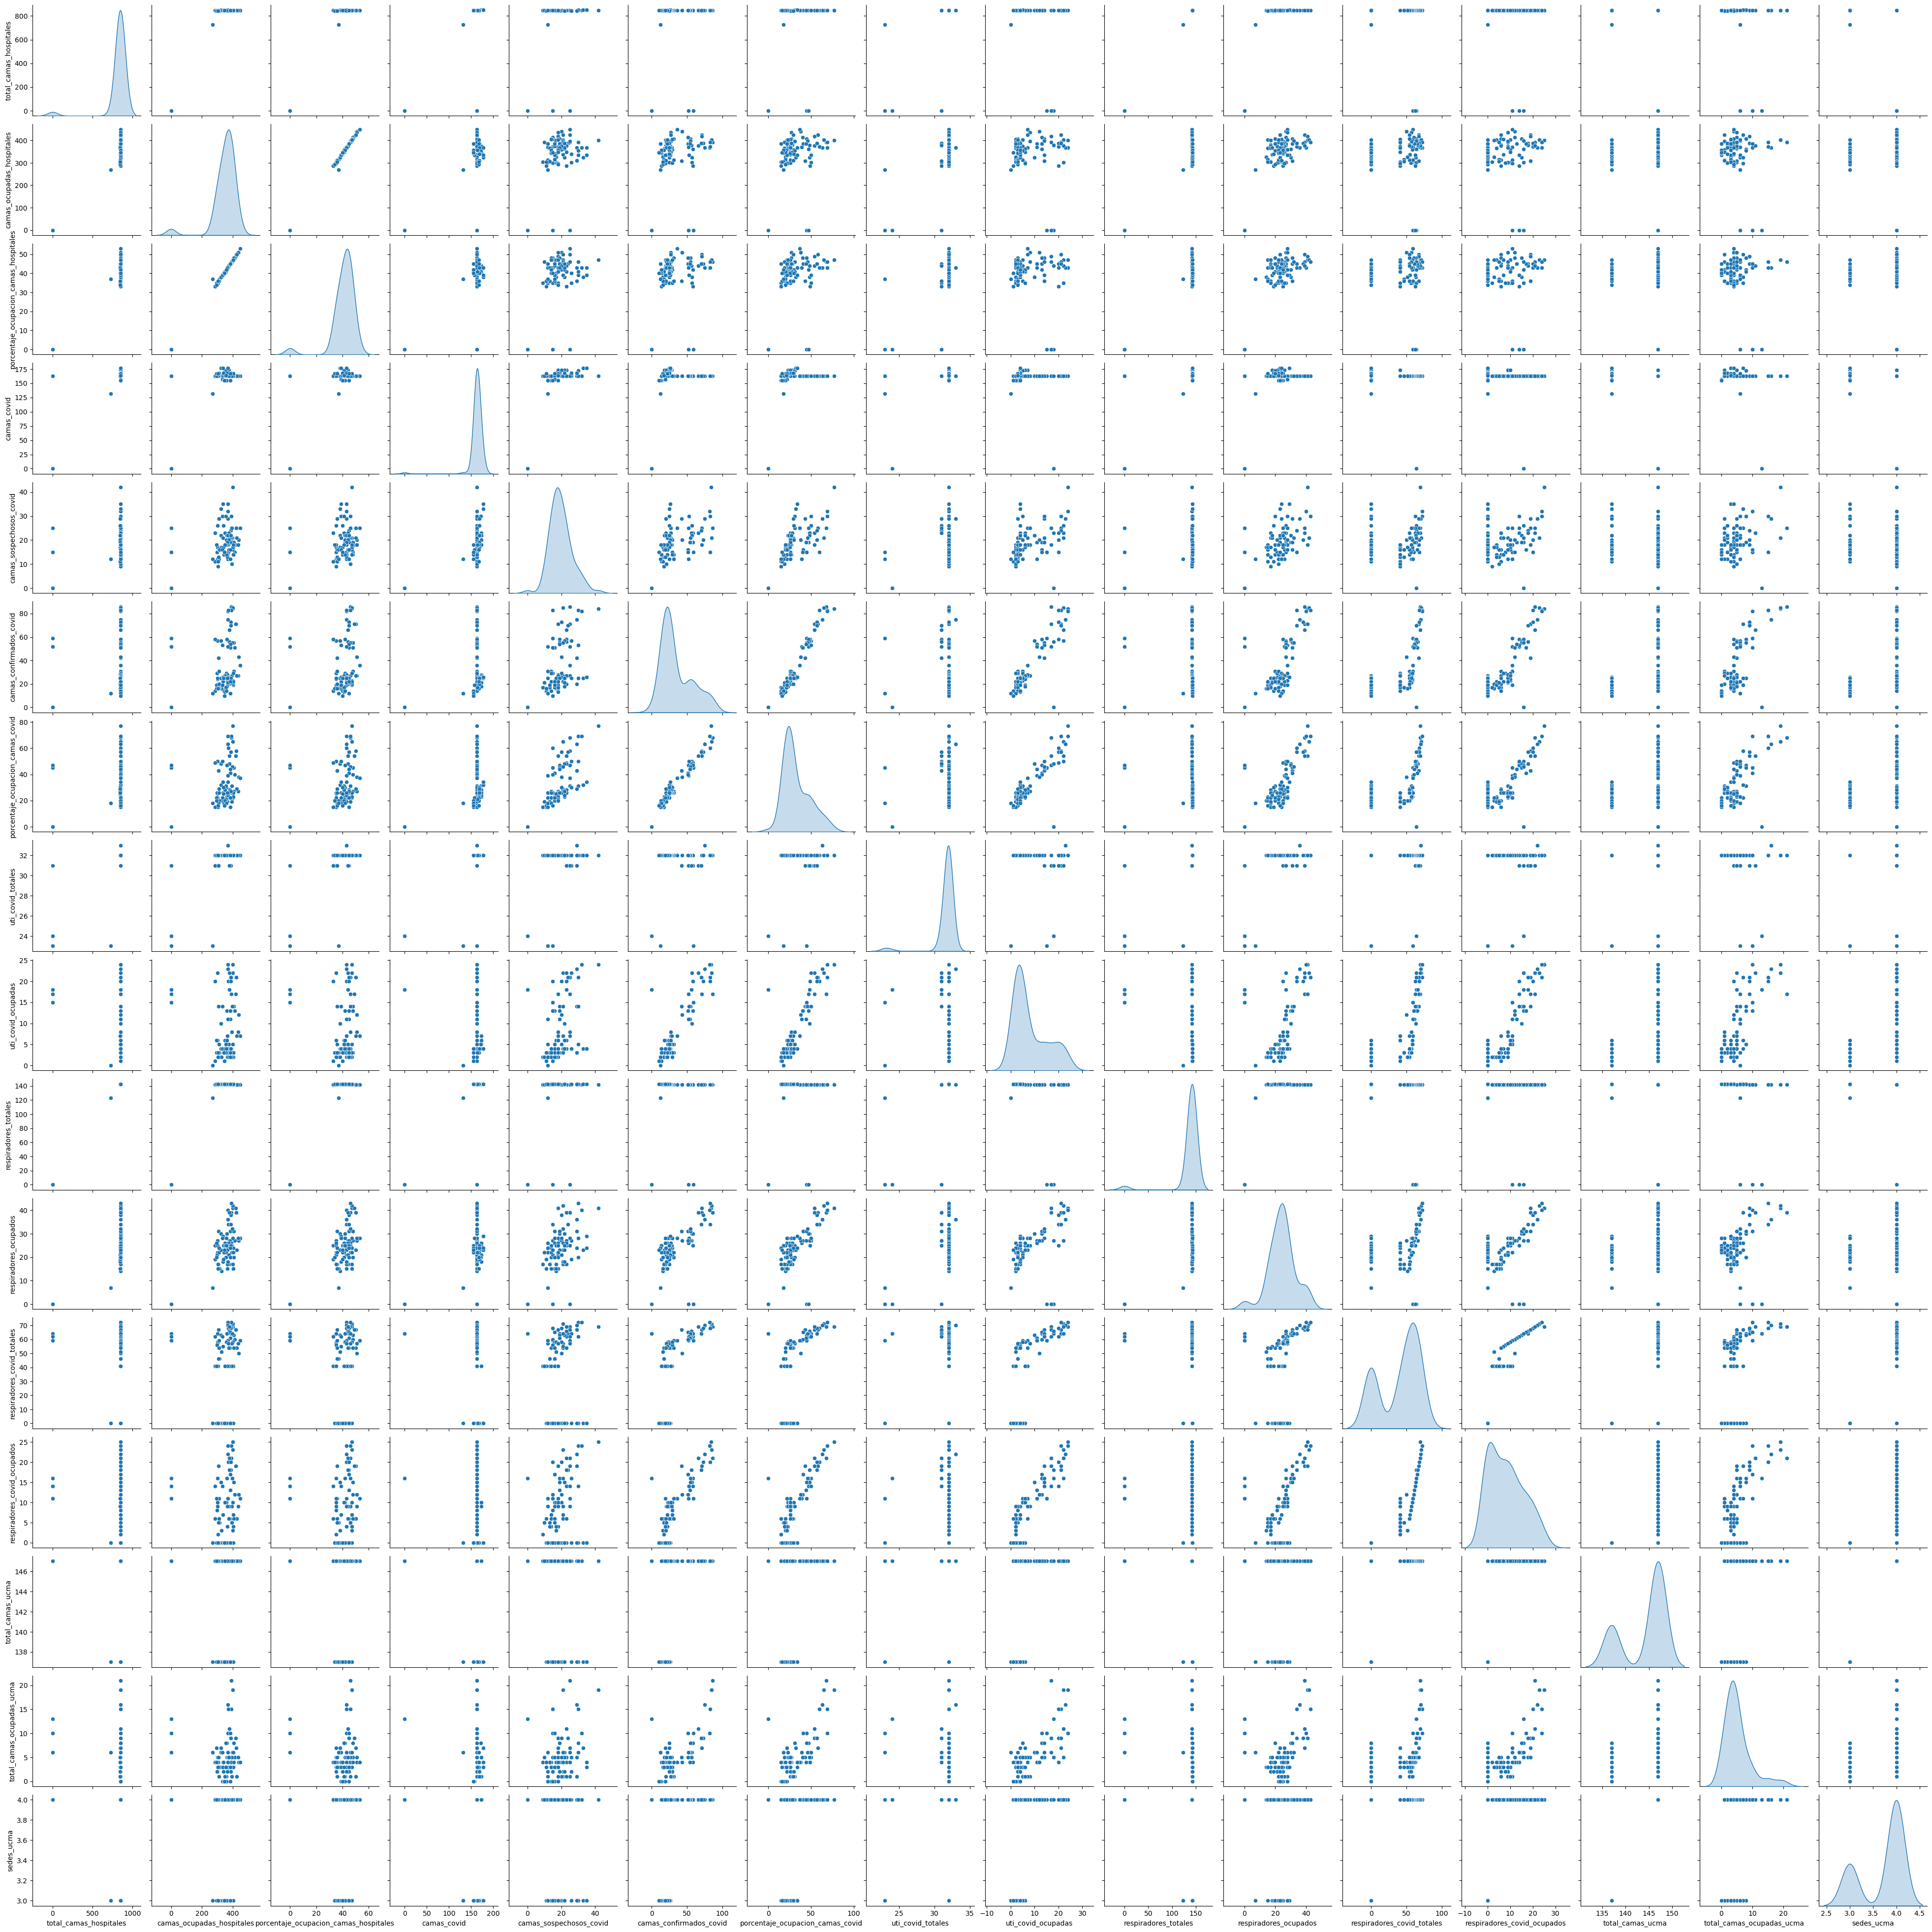

In [8]:
# Histogramas de cols
_, ax2 = plt.subplots(4,4, figsize = ( 20, 14))
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_camas, bins=10,stat='density', ax=ax2[ax_row][i%4])  

# Ajute normal
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  ajuste_norm(data_camas[namecols[i+1]],ax2[ax_row][i%4])  

sns.pairplot(data_camas,diag_kind="kde")  

## Ejercicio N°2.2

- Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
- Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
- Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.). Cómo podrían hacer no supervisado este proceso?

In [9]:
# Funciones adicionales
# ------------------------------------------------------------------------------
def dataset_classic(PamA,PamB,N):
  muA, sigmaA = PamA[0], PamA[1]
  muB, sigmaB = PamB[0], PamB[1]

  # dataset balanceado
  datosA = np.random.normal(muA, sigmaA, size=(int(N/2),1)); #creando muestra de datosA
  datosB = np.random.normal(muB, sigmaB, int(N/2))[:,None]; #creando muestra de datosB

  # Clase A <-> 0
  claseA = np.zeros(datosA.shape);
  claseB = np.ones(datosB.shape);
  Datos = np.concatenate((datosA,datosB));
  Clase = np.concatenate( (claseA,claseB) );
  return Datos, Clase

# ------------------------------------------------------------------------------
def dataset_newage(PamA,PamB,N):
  muA, sigmaA = PamA[0], PamA[1] # media y desvio estandar
  muB, sigmaB = PamB[0], PamB[1] # media y desvio estandar
  datosA = np.random.normal(muA, sigmaA, size=int(N/2)); #creando muestra de datosA
  datosB = np.random.normal(muB, sigmaB, int(N/2)); #creando muestra de datosB

  #datasetA = pd.DataFrame({'x': datosA,'Color': 'r','Clase':'A'})
  #datasetB = pd.DataFrame({'x': datosB,'Color': 'b','Clase':'B'})

  datasetA = pd.DataFrame({'x': datosA,'Color': 'r','Clase': 0})
  datasetB = pd.DataFrame({'x': datosB,'Color': 'b','Clase': 1})
  return datasetA,datasetB
  #eturn pd.concat([datasetA,datasetB], ignore_index=True)

# ------------------------------------------------------------------------------
def clasificador(datos,T):
    prediccion = np.zeros(datos.shape);
    prediccion[datos > T] = 1;
    return(prediccion);

# ------------------------------------------------------------------------------
def medidas(clase,prediccion,N):
    # np.sum(prediccion): cant. total de detecciones + (suma predicciones positivas))
    # N:                  cant. total casos correctos (suma de condiciones positivas)
    # PP: cantidad Predicciones Positivas
    # RP: cantidad Reales positivas

    TP = np.sum( np.logical_and(clase,prediccion));
    RP = np.sum(clase > 0.5) # Caso positivo es "1"
    PP = np.sum(prediccion > 0.5)
    Precision = TP/PP;
    Sensibilidad = TP/RP
    FPR = (PP-TP)/RP
    return(Precision,Sensibilidad,FPR,TP,PP)
 

### Generacón de Datos Sinteticos

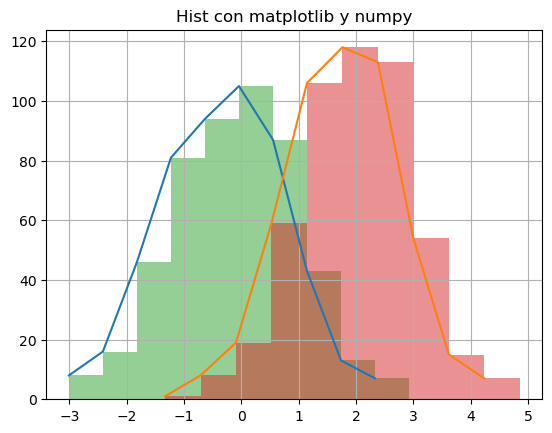

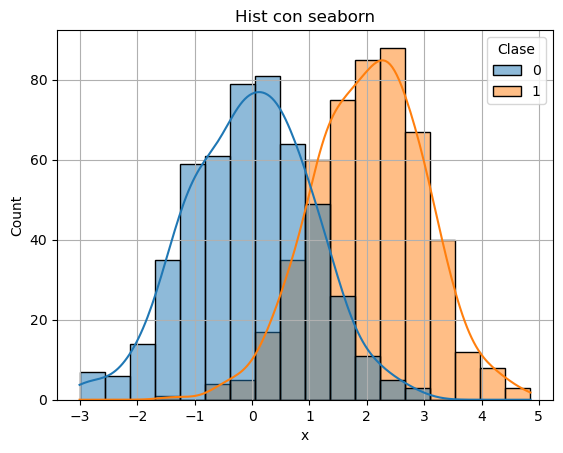

In [10]:
#@title Generación de daset sintético de dos clases

N = 1000; # Cantidad de datos
PamA = [0, 1] # media y desvio estandar
PamB = [2, 1] # media y desvio estandar
datasetA,datasetB = dataset_newage(PamA,PamB,N)
dataset = pd.concat([datasetA,datasetB], ignore_index=True)

# Graficando histogramas
# old school
_,ax = plt.subplots(1,1)
countA,xA = np.histogram(datasetA['x']);
countB,xB = np.histogram(datasetB['x']);
ax.plot(xA[0:len(xA)-1],countA);
ax.plot(xB[0:len(xB)-1],countB);

plt.hist(datasetA['x'],alpha=0.5)
plt.hist(datasetB['x'],alpha=0.5)
ax.grid(); ax.set_title('Hist con matplotlib y numpy')

# new school
_,ax1 = plt.subplots(1,1)
sns.histplot(data=dataset, x='x', hue='Clase', alpha = .5, kde=True, ax=ax1)
ax1.grid(); ax1.set_title('Hist con seaborn');



### Cálculo de curva ROC (Clasificador ML)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   Color   1000 non-null   object 
 2   Clase   1000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


None

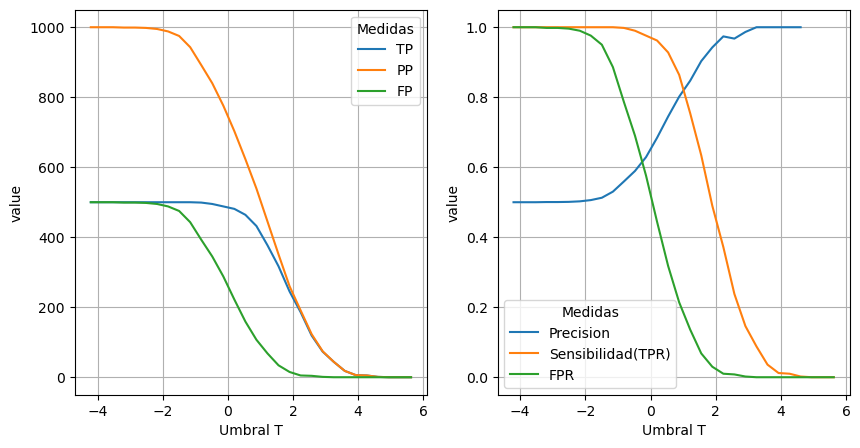

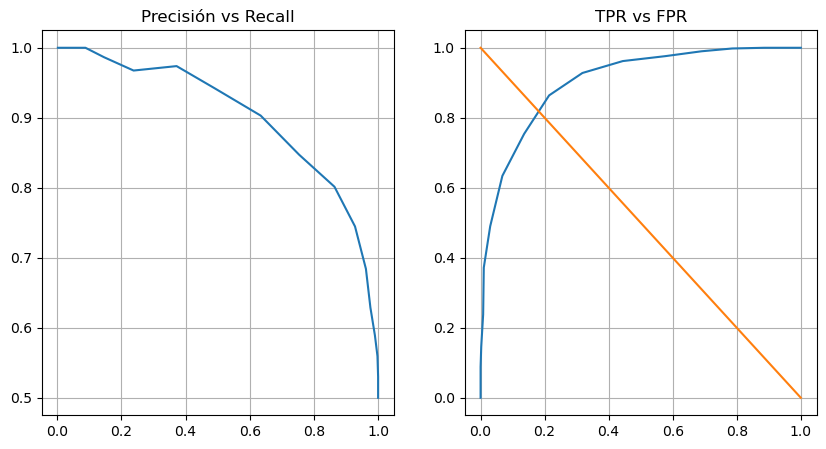

In [11]:
#@title Cálculo de curva ROC (Clasificador ML)

datasetA,datasetB = dataset_newage(PamA,PamB,N)
dataset = pd.concat([datasetA,datasetB], ignore_index=True)
display(dataset.info())

# vectores de valores del umbral T a evaluar
T_vec = np.linspace(dataset['x'].min()-1, dataset['x'].max()+1,30)
Precision = np.zeros(T_vec.shape)
Sensibilidad = np.zeros(T_vec.shape)
TP = np.zeros(T_vec.shape)
PP = np.zeros(T_vec.shape)
FPR = np.zeros(T_vec.shape)

for i in range(T_vec.size):
    T = T_vec[i];
    Predicciones = clasificador(dataset['x'],T);

    # Cálculo de medidas de desempeño
    Precision[i],Sensibilidad[i],FPR[i],TP[i],PP[i] = medidas(dataset['Clase'],Predicciones,N); # N es  ant. total casos correctos (suma de condiciones positivas)

medidas_rel = pd.DataFrame({'Umbral T':T_vec,'Precision':Precision,'Sensibilidad(TPR)':Sensibilidad,'FPR':FPR})
medidas_abs = pd.DataFrame({'Umbral T':T_vec,'TP':TP, 'PP':PP, 'FP':PP-TP})

_,ax = plt.subplots(1,2,figsize=(10, 5))
sns.lineplot(x='Umbral T', y='value', hue='Medidas', data=pd.melt(medidas_abs, 'Umbral T',var_name='Medidas'),ax=ax[0])
sns.lineplot(x='Umbral T', y='value', hue='Medidas', data=pd.melt(medidas_rel, 'Umbral T',var_name='Medidas'),ax=ax[1])
ax[0].grid(); ax[1].grid(); 
_,ax1 = plt.subplots(1,2,figsize=(10, 5))
ax1[0].plot(Sensibilidad,Precision);
ax1[0].grid(); ax1[0].set_title('Precisión vs Recall');

ax1[1].plot(FPR,Sensibilidad)
ax1[1].plot([1,0],[0,1]);
ax1[1].grid(); ax1[1].set_title('TPR vs FPR');
